In [18]:
# Import dependencies
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Read csv file
newfile = 'Resources/Climate_Deniers_Map.csv'
df = pd.read_csv(newfile)

# Convert to appropriate data types & extract date column
newdf = df.copy()
newdf['created_at'] = df['created_at'].astype('datetime64')
newdf['date'] = newdf['created_at'].dt.to_period('M')

# Organize columns & display data
data = newdf.loc[:, ['date', 'lat', 'lng', 'topic', 'sentiment', 'aggressiveness', 'gender', 'created_at']]
print(data.dtypes)
data.head()


date                   period[M]
lat                      float64
lng                      float64
topic                     object
sentiment                float64
aggressiveness            object
gender                    object
created_at        datetime64[ns]
dtype: object


,date,lat,lng,topic,sentiment,aggressiveness,gender,created_at
0,2006-12,36.072640,-79.791980,Weather Extremes,-0.565028,aggressive,male,2006-12-17 19:43:09
1,2007-01,36.112637,-80.014484,Weather Extremes,-0.377974,aggressive,male,2007-01-18 13:22:52
2,2007-01,25.963890,-80.244170,Weather Extremes,0.567071,not aggressive,undefined,2007-01-24 10:13:18
3,2007-03,30.287986,-97.778898,Weather Extremes,-0.253728,not aggressive,male,2007-03-03 15:23:53
4,2007-03,37.779026,-122.419906,Weather Extremes,-0.433604,aggressive,male,2007-03-13 23:03:07


In [4]:
# Group by topics & get the first posts for each
topics = data.groupby('topic')
early = topics['created_at'].min()

# Get the first few posts for each topic to see the following spread
topics2 = data.groupby('topic')['created_at'].nsmallest(10)
topics2

# Merge each of these sets with original df to get the info for each post
firsts = pd.merge(early, data, how='left')
spread = pd.merge(topics2, data, how='left')

# Display data
print(len(spread))
firsts


100


,created_at,date,lat,lng,topic,sentiment,aggressiveness,gender
0,2007-04-06 08:17:31,2007-04,35.227209,-80.843083,Donald Trump versus Science,-0.604242,not aggressive,male
1,2007-03-31 12:16:59,2007-03,35.227090,-80.843130,Global stance,-0.404815,not aggressive,male
2,2007-04-07 15:26:24,2007-04,30.271129,-97.743700,Ideological Positions on Global Warming,-0.515978,not aggressive,male
3,2007-05-02 17:11:53,2007-05,50.666480,-120.319200,Impact of Resource Overconsumption,-0.690117,aggressive,male
4,2007-04-20 18:17:23,2007-04,42.081156,-87.980216,Importance of Human Intervantion,-0.359227,aggressive,male
5,2007-08-19 13:33:24,2007-08,51.508530,-0.125740,Politics,-0.295054,aggressive,male
6,2007-04-12 03:40:27,2007-04,27.947520,-82.458430,Seriousness of Gas Emissions,-0.456556,aggressive,male
7,2007-10-03 06:57:04,2007-10,-27.467940,153.028090,Significance of Pollution Awareness Events,-0.737047,aggressive,male
8,2007-07-12 17:49:09,2007-07,38.895110,-77.036370,Undefined / One Word Hashtags,0.761608,not aggressive,male
9,2006-12-17 19:43:09,2006-12,36.072640,-79.791980,Weather Extremes,-0.565028,aggressive,male


In [5]:
%%capture --no-display

# Configure the map plot
map1 = spread.hvplot.points(
    "lng",
    "lat",
    coastline = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    s = 100,
    color = "topic",
    #colormap = ("inferno"),
    alpha = .7
) 
map2 = firsts.hvplot.points(
    "lng",
    "lat",
    coastline = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 400,
    s = 100,
    color = "red"
)

# Display the map
map1 # * map2
# need to figure out how to overlay, or do a subplot to show side-by-side w/firsts highlighted

#majority of twitter users & majority of climate change discourse originates in the US
#no major discernible patterns in geographic locations to the spread, except that nearly
#all the early posts come from coastal regions, regardless of country/continent
#(only a few exceptions in the first 3 from the US midwest region)

:Overlay
   .Tiles.I     :Tiles   [x,y]
   .Points.I    :Points   [lng,lat]   (topic)
   .Coastline.I :Feature   [Longitude,Latitude]

In [6]:
# Create bins based on quartiles of sentiment value
print(data['sentiment'].describe())

bins = [-1, -.5, -.2, 0, 1]
names = ["Very Low", "Low", "Average", "High"]

data['Sentiment'] = pd.cut(data['sentiment'], bins, labels=names, include_lowest=True)
data.head()


count    365317.000000
mean         -0.225414
std           0.384433
min          -0.989643
25%          -0.522066
50%          -0.331963
75%           0.030237
max           0.979194
Name: sentiment, dtype: float64


,date,lat,lng,topic,sentiment,aggressiveness,gender,created_at,Sentiment
0,2006-12,36.072640,-79.791980,Weather Extremes,-0.565028,aggressive,male,2006-12-17 19:43:09,Very Low
1,2007-01,36.112637,-80.014484,Weather Extremes,-0.377974,aggressive,male,2007-01-18 13:22:52,Low
2,2007-01,25.963890,-80.244170,Weather Extremes,0.567071,not aggressive,undefined,2007-01-24 10:13:18,High
3,2007-03,30.287986,-97.778898,Weather Extremes,-0.253728,not aggressive,male,2007-03-03 15:23:53,Low
4,2007-03,37.779026,-122.419906,Weather Extremes,-0.433604,aggressive,male,2007-03-13 23:03:07,Low


In [7]:
# Create graph showing early posts by number/% aggressive/sentiment breakdown for one topic (maybe interactive?)
# stick to first few years on this one for more detail

51412


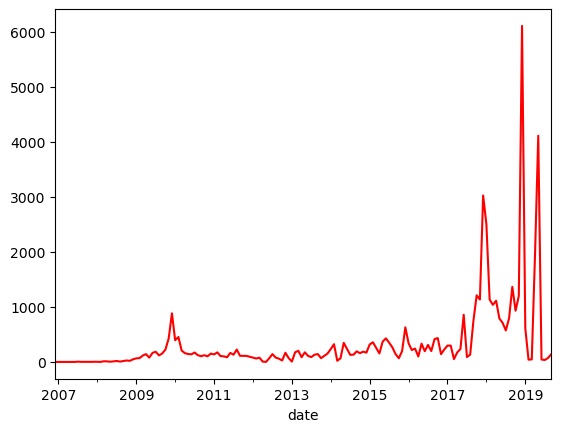

In [24]:
# Create overview for full time range - strongest negative sentiment & aggressive posts only
# Create new df isolating those with strong negative sentiments
negative = data.loc[(data['Sentiment'] == 'Very Low') & (data['aggressiveness'] == 'aggressive'), ['date', 'topic', 'sentiment', 'gender']].reset_index(drop=True)
print(len(negative))
negative.head()

count = negative.groupby('date').count()
# What is the shape over time, are there waves, etc
# Line graph, maybe scatter w/linear regression of some kind?
count['topic'].plot(kind='line', color='red')
plt.show()


